# 多项式回归
## 公式推导

### 闭式解方法 正规方程

* 损失函数定义为平方损失函数

$$ 
\begin{array}{l}{\cos t=\frac{1}{2}(f(X)-Y)^{2}} \\ {L=\frac{1}{N} \times \sum_{i=1}^{N} \frac{1}{2}\left(\sum_{j=0}^{M}\left(w_{j} x_{i}^{j}\right)-y_{i}\right)^{2}}\end{array}
 $$

* 求导并使导数为0，直接求出权值
 
 $$ 
\begin{array}{c}\begin{array}{l}{\frac{\partial L}{\partial w_{k}}=\frac{1}{N} \times \sum_{i=1}^{N} \frac{1}{2} \times 2\left(x_{i}^{k} \times\left(\sum_{j=0}^{M}\left(w_{j} x_{i}^{k}\right)-y_{i}\right)\right)} \\ {=\frac{1}{N} \times \sum_{i=1}^{N}\left(x_{i}^{k} \times \sum_{j=0}^{M}\left(w_{j} x_{i}^{j}\right)-x_{i}^{k} \times y_{i}\right)} \\ {=0}\end{array} \\ {\downarrow} \\
x_{1}^{k} \sum_{j=1}^{m} w_{j} x_{1}^{j}+x_{2}^{K} \sum_{j=1}^{m} w_{j} x_{2}^{j} \cdots x_{n}^{K} \sum_{j=1}^{m} w_{j} x_{n}^{j}=\sum_{i=1}^{n} x_{i}^{k} y_{i}
\\ {\downarrow} \\
\left[x_{1}^{k} \dots x_{n}^{k}\right]
\begin{bmatrix}
x_{1}^{0}& \cdots\ &x_{1}^{m}\\
&  \cdots\  &\\
&\vdots \\
x_{n}^{0}& \cdots\ &x_{n}^{m}
\end{bmatrix}
\left[\begin{array}{c}{w_{0}} \\ {\vdots} \\ {w_{m}}\end{array}\right] = \left[x_{1}^{k} \cdots\ x_{n}^{k}\right] \left[\begin{array}{c}{y_{1}} \\ {\vdots} \\ {y_{n}}\end{array}\right]
\end{array} 
 $$


* 上式所求的$w_{k}$可以用含有$ w_{0} w_{1} \cdots\ w_{k-1} \cdots\ w_{m} $ 的式子表示，这些$ w $值表示的是相应权重值的最优解，因而可以利用线性代数将所有权重值求出

 $$ 
\begin{array}{c}\left[x_{1}^{k} \dots x_{n}^{k}\right]
\begin{bmatrix}
x_{1}^{0}& \cdots\ &x_{1}^{m}\\
&  \cdots\  &\\
&\vdots \\
x_{n}^{0}& \cdots\ &x_{n}^{m}
\end{bmatrix}
\left[\begin{array}{c}{w_{0}} \\ {\vdots} \\ {w_{m}}\end{array}\right] = \left[x_{1}^{k} \cdots\ x_{n}^{k}\right] \left[\begin{array}{c}{y_{1}} \\ {\vdots} \\ {y_{n}}\end{array}\right] \\ {\downarrow} \\ 
\begin{bmatrix}
x_{1}^{0}& \cdots\ &x_{n}^{0}\\
&  \cdots\  &\\
&\vdots \\
x_{1}^{m}& \cdots\ &x_{n}^{m}
\end{bmatrix}
\begin{bmatrix}
x_{1}^{0}& \cdots\ &x_{1}^{m}\\
&  \cdots\  &\\
&\vdots \\
x_{n}^{0}& \cdots\ &x_{n}^{m}
\end{bmatrix}
\left[\begin{array}{c}{w_{0}} \\ {\vdots} \\ {w_{m}}\end{array}\right] = 
\begin{bmatrix}
x_{1}^{0}& \cdots\ &x_{n}^{0}\\
&  \cdots\  &\\
&\vdots \\
x_{1}^{m}& \cdots\ &x_{n}^{m}
\end{bmatrix}
\left[\begin{array}{c}{y_{1}} \\ {\vdots} \\ {y_{n}}\end{array}\right]
\end{array} 
 $$


* 由上式即可得梯度下降中的正规方程
$$
\begin{array}{c} x^{\top} x w =x^{\top} y \\ {\downarrow} \\ w =\left(x^{\top} x\right)^{-1} x^{\top} y \end{array}
$$


### 梯度下降方法

* 由以上推导可知道 当损失函数为平方损失函数的时候，每个权值的导数可以表示为

$$ 
\nabla_{w} \operatorname{MSE}(w)=\left(\begin{array}{c}{\frac{\partial}{\partial w_{0}} \operatorname{MSE}(w)} \\ {\frac{\partial}{\partial w_{1}} \operatorname{MSE}(w)} \\ {\vdots} \\ {\frac{\partial}{\partial w_{n}} \operatorname{MSE}(w)}\end{array}\right)
=
x^{\top} x w-x^{\top} y
=
x^{\top}( x w- y)
 $$

## 实现多项式分类器PolynomialRegression

In [1]:
import numpy as np

In [49]:
class PolynomialRegression:
    '''
    只支持numpy数组的输入
    '''
    def __init__(self):
        self.w = None
        self.w_gradient = None
        self.loss_gradient = None
    def fit(self, x, y, method = 'target', learning_rate = 0.01, iteration_times = 50):
        '''
        只支持二维数组
        '''
        x= np.hstack((np.ones((len(x), 1)), x))
        x = np.mat(x)
        y = np.mat(y)
        if(method == 'gradient'):
            '''
            梯度下降
            '''
            return self.fit_gradient(x, y, learning_rate, iteration_times)
        elif(method == 'random_gradient'):
            pass
        else:
            '''
            默认正规方程法
            '''
            return self.fit_target(x, y)
    def fit_target(self, x, y):
        self.w = np.mat((x.T * x).I * x.T * y)
        return self
    def fit_gradient(self, x, y, learning_rate, iteration_times):
        self.w_gradient = []
        self.loss_gradient = []
        self.w_gradient.append(np.mat(np.random.rand(x.shape[1], 1)))
        for i in range(iteration_times):
            w_derivative = np.mat(x.T * (x * self.w_gradient[-1] - y))
            self.w_gradient.append(self.w_gradient[-1] - learning_rate * w_derivative)
        self.w = self.w_gradient[-1]
        return self
        
        return self
    def transform(self, x):
        x= np.hstack((np.ones((len(x), 1)), x))
        x = np.mat(x)
        return x * self.w
    def fit_transform(self, x, y):
        x= np.hstack((np.ones((len(x), 1)), x))
        x = np.mat(x)
        y = np.mat(y)
        self.w = (x.T * x).I * x.T * y
        return x * self.w
            

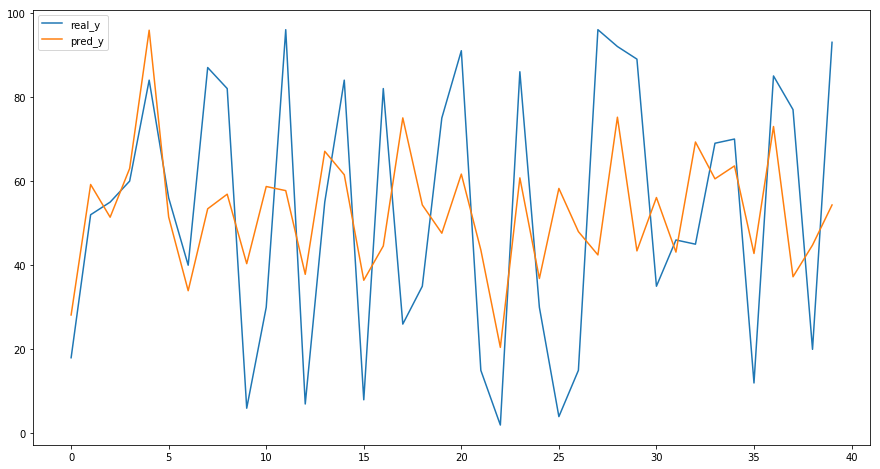

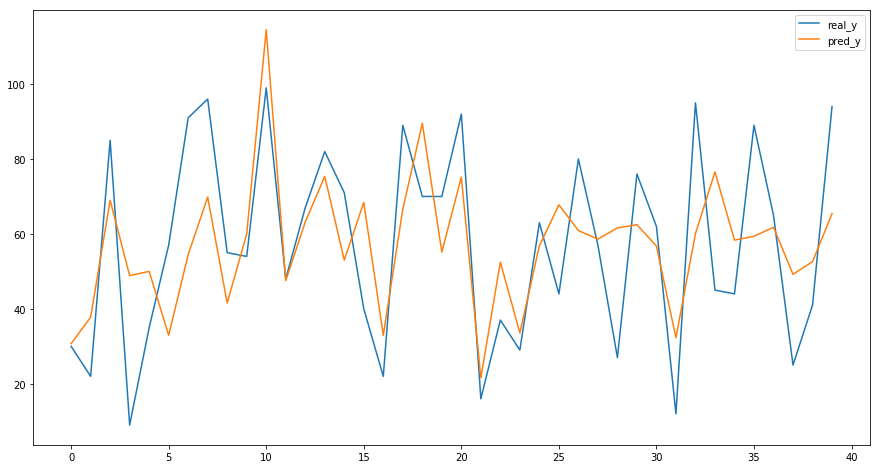

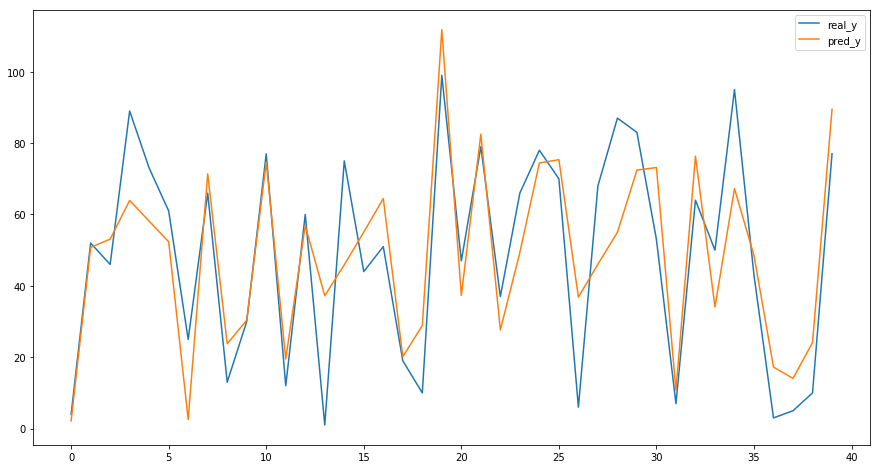

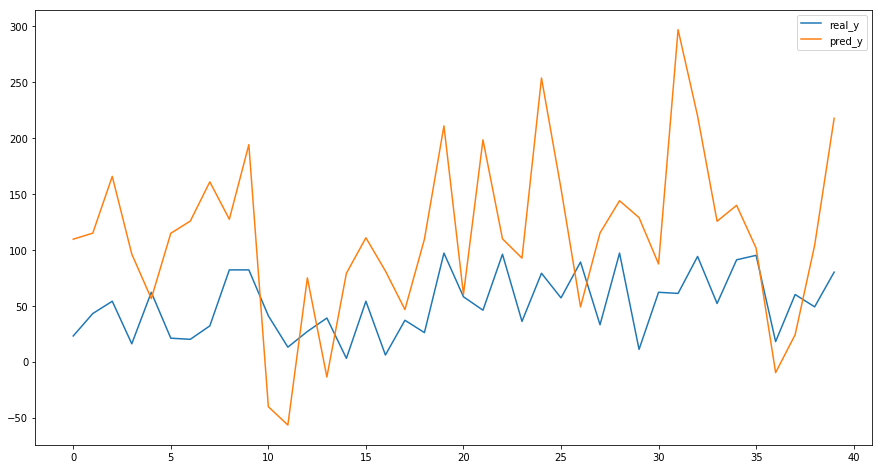

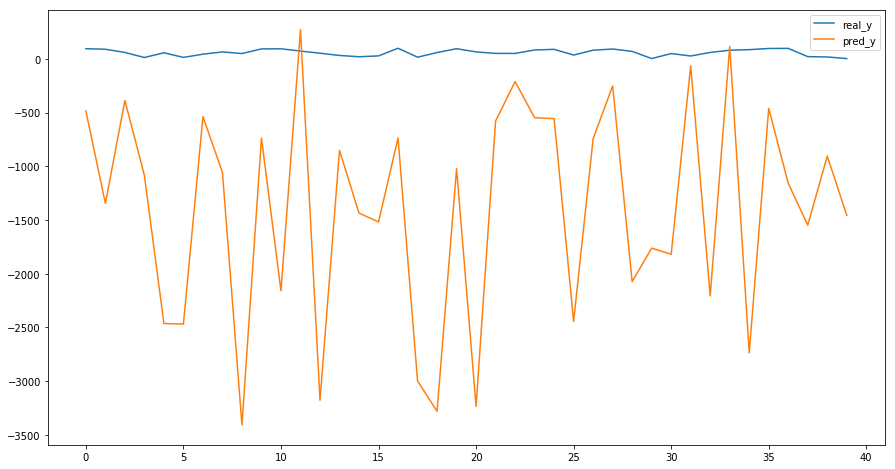

In [39]:
#if __name__ == 'main':
for i in range(10, 51, 10):
    x = np.random.randint(1, 100, (40, i))
    y = np.random.randint(1, 100, (40, 1))
    reg_result = PolynomialRegression().fit(x, y).transform(x)
    import matplotlib.pyplot as plt
    fig = plt.figure(num = 1, figsize = (15, 8))
    plt.plot(np.arange(len(y)), y, label = 'real_y')
    plt.plot(np.arange(len(reg_result)), reg_result, label = 'pred_y')
    plt.legend()
    plt.show()
    


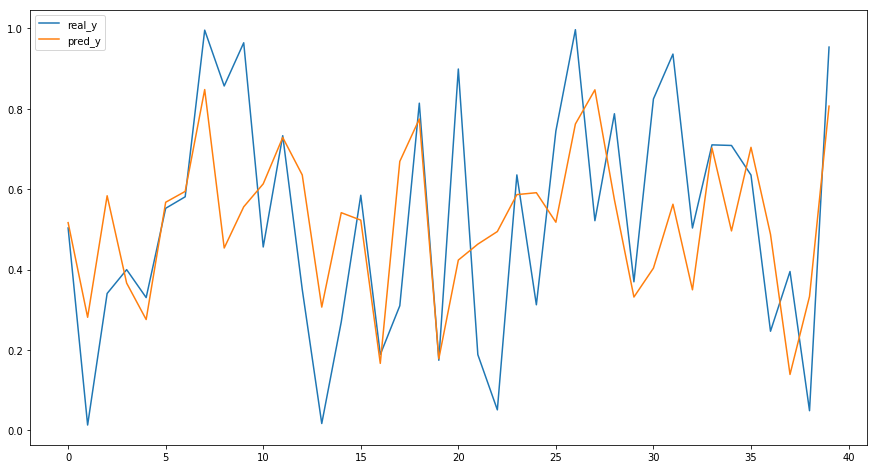

In [90]:
'''
数据归一化极其重要
'''
x = np.random.rand(40, 10)
y = np.random.rand(40, 1)
reg_result = PolynomialRegression().fit(x, y, method = 'gradient', learning_rate = 0.01, iteration_times = 60).transform(x)
import matplotlib.pyplot as plt
fig = plt.figure(num = 1, figsize = (15, 8))
plt.plot(np.arange(len(y)), y, label = 'real_y')
plt.plot(np.arange(len(reg_result)), reg_result, label = 'pred_y')
plt.legend()
plt.show()

## 为什么参数多的时候，严重偏离